In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy.polynomial.polynomial import Polynomial

## Functions

In [ ]:
def calculate_population_percentage(df, population_col, total_pop_col, new_col_name):
    if population_col not in df.columns or total_pop_col not in df.columns:
        raise ValueError(f"Columns '{population_col}' or '{total_pop_col}' not found in DataFrame.")

    df[new_col_name] = (df[population_col] / df[total_pop_col]) * 100
    return df


In [ ]:
def plot_vote_share_vs_population(df, population_col, dem_col, rep_col, degree=2):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x=population_col,
        y=dem_col,
        color='blue',
        label='Democratic Vote Share',
        alpha=0.6
    )
    sns.scatterplot(
        data=df,
        x=population_col,
        y=rep_col,
        color='red',
        label='Republican Vote Share',
        alpha=0.6
    )

    democratic_poly = Polynomial.fit(df[population_col], df[dem_col], deg=degree)
    x_vals = np.linspace(df[population_col].min(), df[population_col].max(), 100)
    plt.plot(x_vals, democratic_poly(x_vals), color='blue', label='Democratic Line')

    republican_poly = Polynomial.fit(df[population_col], df[rep_col], deg=degree)
    plt.plot(x_vals, republican_poly(x_vals), color='red', label='Republican Line')

    # Customize plot
    plt.title('Non-Linear Vote Share vs Population Percentage', fontsize=16)
    plt.xlabel(f'{population_col.replace("_", " ")}', fontsize=14)
    plt.ylabel('Vote Share', fontsize=14)
    plt.legend(title="Vote Share", fontsize=12)
    plt.grid(alpha=0.3)

    # Show plot
    plt.show()

## Import data

In [6]:
sc_election_df = pd.read_json('states/south_carolina/election/sc_election.json')
sc_race_df = pd.read_json('states/south_carolina/demographics/south_carolina_precincts_racial_population.json')
sc_region_type_df = pd.read_json('states/south_carolina/geodata/south_carolina_precincts_region_type.json')

## Main script

In [7]:
print(sc_election_df.head())

                 UNIQUE_ID  CONG_DIST  COUNTYFP      County  Prec_Code  \
0  DORCHESTER_PRECINCT_084          1        35  DORCHESTER         84   
1  DORCHESTER_PRECINCT_072          1        35  DORCHESTER         72   
2  DORCHESTER_PRECINCT_036          1        35  DORCHESTER         36   
3  DORCHESTER_PRECINCT_035          1        35  DORCHESTER         35   
4  DORCHESTER_PRECINCT_094          1        35  DORCHESTER         94   

       Precinct  TOT_REP  TOT_DEM  TOT_VOT        LEAN  ...  GCON03RDUN  \
0  BEECH HILL 2      540      286      826  Republican  ...           0   
1       CYPRESS      682      479     1161  Republican  ...           0   
2      DELEMARS       85       69      154  Republican  ...           0   
3       GIVHANS      296      144      440  Republican  ...           0   
4     GIVHANS 2      360      189      549  Republican  ...           0   

   GCON04RTIM  GCON05RNOR  GCON06RBUC  GCON07RFRY  GCON01DAND  GCON02DLAR  \
0           0           0  

In [8]:
print(sc_race_df.head())

                 UNIQUE_ID          NAME  Prec_Code  CONG_DIST  TOT_POP22  \
0  DORCHESTER_PRECINCT_084  BEECH HILL 2         84          1       3569   
1  DORCHESTER_PRECINCT_072       CYPRESS         72          1       3916   
2  DORCHESTER_PRECINCT_036      DELEMARS         36          1          0   
3  DORCHESTER_PRECINCT_035       GIVHANS         35          1          0   
4  DORCHESTER_PRECINCT_094     GIVHANS 2         94          1       1558   

   NHSP_POP22  HSP_POP22  WHT_NHSP22  BLK_NHSP22  AIA_NHSP22  ASN_NHSP22  \
0        3482         87        3482           0           0           0   
1        3760        156        2661         772           0          19   
2           0          0           0           0           0           0   
3           0          0           0           0           0           0   
4        1541         17         837         456           0           0   

   HPI_NHSP22  OTH_NHSP22  
0           0           0  
1           0         30

In [9]:
sc_election_df['Republican_Vote_Share'] = (sc_election_df['TOT_REP'] / sc_election_df['TOT_VOT']) * 100
sc_election_df['Democratic_Vote_Share'] = (sc_election_df['TOT_DEM'] / sc_election_df['TOT_VOT']) * 100


In [13]:
# sc_race_df['Black_Pop_Percent'] = (sc_race_df['BLK_NHSP22'] / sc_race_df['TOT_POP22'])
sc_race_df['White_Pop_Percent'] =  (sc_race_df['WHT_NHSP22'] / sc_race_df['TOT_POP22']) * 100

In [14]:
sc_merged_df = pd.merge(sc_election_df, sc_race_df, on='UNIQUE_ID', how='inner')
sc_merged_df = pd.merge(sc_merged_df, sc_region_type_df, on='UNIQUE_ID', how='inner')

In [15]:
print(sc_merged_df.head())

                 UNIQUE_ID  CONG_DIST_x  COUNTYFP      County  Prec_Code_x  \
0  DORCHESTER_PRECINCT_084            1        35  DORCHESTER           84   
1  DORCHESTER_PRECINCT_084            1        35  DORCHESTER           84   
2  DORCHESTER_PRECINCT_084            1        35  DORCHESTER           84   
3  DORCHESTER_PRECINCT_084            1        35  DORCHESTER           84   
4  DORCHESTER_PRECINCT_072            1        35  DORCHESTER           72   

       Precinct  TOT_REP  TOT_DEM  TOT_VOT        LEAN  ...  HSP_POP22  \
0  BEECH HILL 2      540      286      826  Republican  ...         87   
1  BEECH HILL 2      540      286      826  Republican  ...         87   
2  BEECH HILL 2      540      286      826  Republican  ...          0   
3  BEECH HILL 2      540      286      826  Republican  ...          0   
4       CYPRESS      682      479     1161  Republican  ...        156   

   WHT_NHSP22  BLK_NHSP22  AIA_NHSP22  ASN_NHSP22  HPI_NHSP22  OTH_NHSP22  \
0        

In [16]:
columns_to_keep = ['UNIQUE_ID', 'Republican_Vote_Share', 'Democratic_Vote_Share', 'White_Pop_Percent', 'region_type']

sc_merged_df = sc_merged_df[columns_to_keep]

In [17]:
# # sc_merged_df = sc_merged_df.dropna(subset=['Black_Pop_Percent', 'Democratic_Vote_Share'])
sc_merged_df = sc_merged_df.dropna(subset=['White_Pop_Percent', 'Democratic_Vote_Share', 'Republican_Vote_Share'])


In [19]:
# remove 0.0 100.0 from White_Pop_Percent
sc_merged_df = sc_merged_df[(sc_merged_df['White_Pop_Percent'] != 0.0) & (sc_merged_df['White_Pop_Percent'] != 100.0)]
# remove 0.0 100.0 from Republican_Vote_Share
sc_merged_df = sc_merged_df[(sc_merged_df['Republican_Vote_Share'] != 0.0) & (sc_merged_df['Republican_Vote_Share'] != 100.0)]
sc_merged_df = sc_merged_df[(sc_merged_df['Democratic_Vote_Share'] != 0.0) & (sc_merged_df['Democratic_Vote_Share'] != 100.0)]


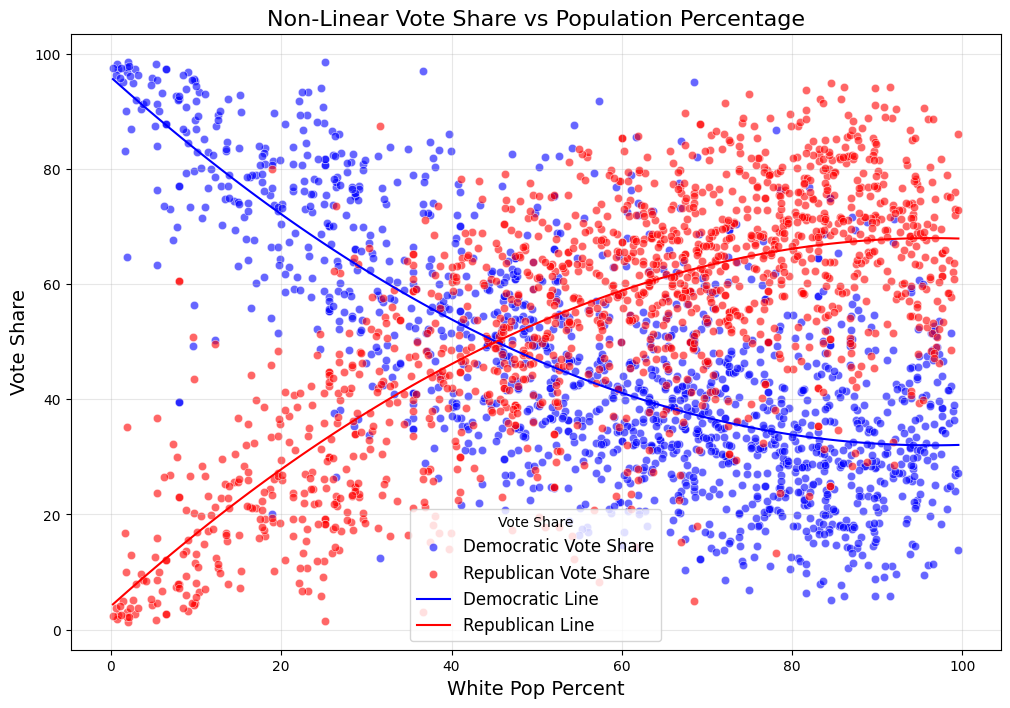

In [23]:
plot_vote_share_vs_population(
    df=sc_merged_df,
    population_col='White_Pop_Percent',
    dem_col='Democratic_Vote_Share',
    rep_col='Republican_Vote_Share',
    degree=2
)